In [1]:
import keras
from keras.models import Model
from keras.layers import Dense, Input, Dropout
from keras.datasets import mnist
from keras import backend as K

import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0

In [3]:
def show_image(pixels):
    img = pixels.reshape(28, 28)
    
    plt.axis('off')
    plt.imshow(img, cmap='gray_r')

In [4]:
input_layer = Input(shape=(784,))

# Autoencoders can represent both liners and non-linar transformation in encoding.
# The idea is to learn a non-linear representation of the data that minimizes noise 
# while maximizing the ability to truthfully restore the data from the compressed format.
# relu will give us the nonlinearities you want.
hidden1 = Dense(512, activation='relu')(input_layer)
hidden2 = Dense(256, activation='relu')(hidden1)
hidden3 = Dense(128, activation='relu')(hidden2)
hidden4 = Dense(64, activation='relu')(hidden3)

hidden5 = Dense(128, activation='relu')(hidden4)
hidden6 = Dense(256, activation='relu')(hidden5)
hidden7 = Dense(512, activation='relu')(hidden6)
decoder = Dense(784, activation='sigmoid')(hidden7)

# encoded data -> hidden4
model = Model(input_layer, decoder)

encoder = K.function([input_layer], [hidden4])
decode = K.function([hidden4], [decoder])

model.compile(optimizer=keras.optimizers.Adadelta(), loss='binary_crossentropy')

In [5]:
model.fit(X_train, X_train, epochs=12, batch_size=192, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 88s 1ms/step - loss: 0.3140 - val_loss: 0.2564
Epoch 2/12
60000/60000 [==============================] - 98s 2ms/step - loss: 0.2518 - val_loss: 0.2497
Epoch 3/12
60000/60000 [==============================] - 57s 949us/step - loss: 0.2386 - val_loss: 0.2250
Epoch 4/12
60000/60000 [==============================] - 56s 937us/step - loss: 0.2133 - val_loss: 0.2000
Epoch 5/12
60000/60000 [==============================] - 56s 931us/step - loss: 0.1930 - val_loss: 0.1867
Epoch 6/12
60000/60000 [==============================] - 60s 1ms/step - loss: 0.1791 - val_loss: 0.1705
Epoch 7/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1705 - val_loss: 0.1654
Epoch 8/12
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1634 - val_loss: 0.1585
Epoch 9/12
60000/60000 [==============================] - 105s 2ms/step - loss: 0.1569 - val_loss: 0.154

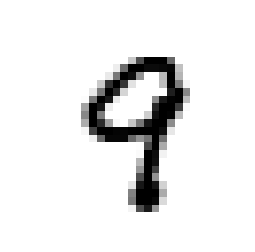

In [12]:
sample = random.choice(X_test)

show_image(sample)

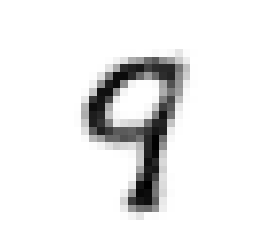

In [13]:
reconstructed = model.predict(sample.reshape(1, -1))

show_image(reconstructed)

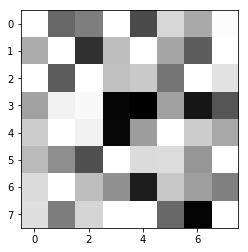

In [14]:
values = encoder([sample.reshape(1, -1)])[0]

# print values.shape, encoder shape

values = (values / np.max(values)).reshape(8, 8)

plt.imshow(values, cmap='gray_r')